# Imports

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from scipy.stats import chi2_contingency
# Import our working functions
import wrangle as w 

# Get preprocessed data

In [2]:
df = pd.read_csv('preprocessed_edu_data.csv')

In [3]:
df.head() # Looking at our data to ensure the right data was pulled. 

,is_male,has_college_degree,free_reduced_lunch,completed_test_prep,parents_married,practiced_sport,is_first_child,nr_siblings,rides_bus,wkly_study_hours_< 5,wkly_study_hours_> 10,risk_cat
0,0,1,1,0,1,1,1,3.0,1,1,0,1
1,0,1,1,0,1,1,1,0.0,1,0,0,0
2,0,1,1,0,0,1,1,4.0,1,1,0,0
3,1,1,1,0,1,0,0,1.0,1,0,0,1
4,1,1,1,0,1,1,1,0.0,1,0,0,0


# **Goals:** 
* Identify features that pertain more to parents social status, rather than the students
* Identify features that have the most statistical value to the risk cat which is our new target variable 1 = students who are considered at risk and 0 = students who are not at risk. 
* We will run statistical testing to determine statistical significance

In [4]:
# lets look at columns to see if we can eleminate a few.
df.columns

Index(['is_male', 'has_college_degree', 'free_reduced_lunch',
       'completed_test_prep', 'parents_married', 'practiced_sport',
       'is_first_child', 'nr_siblings', 'rides_bus', 'wkly_study_hours_< 5',
       'wkly_study_hours_> 10', 'risk_cat'],
      dtype='object')

 `is_male`, `completed_test_prep`, `practiced_sport`, `wkly_study_hours_< 5`, and  `wkly_study_hours_> 10` really dont speak to a students parent social status and this project is aimed to target early dection of high risk students based off parents social status. 

In [5]:
drop_list = ['is_male', 'completed_test_prep', 'practiced_sport', 'wkly_study_hours_< 5', 'wkly_study_hours_> 10']
df.drop(columns= drop_list, inplace= True)

In [6]:
df.columns

Index(['has_college_degree', 'free_reduced_lunch', 'parents_married',
       'is_first_child', 'nr_siblings', 'rides_bus', 'risk_cat'],
      dtype='object')

# Next we need to split our data into our train, validate and test.

In [7]:
train, validate, test = w.split(df)

 **`has_college_degree`:
### H$_0$: There is no statistical significant in parents' education status
### H$_A$: There is a significant statistical importance in parents' education status 

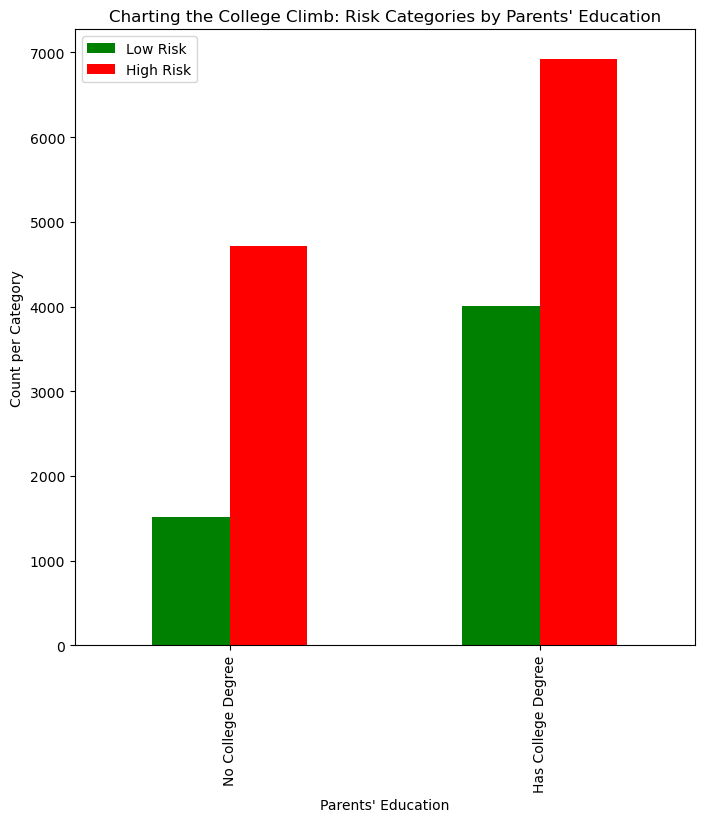

In [8]:
college_degree_crosstab = pd.crosstab(train.has_college_degree, train.risk_cat)
colors = ['green', 'red']
college_degree_crosstab.plot(kind='bar',figsize=(8,8),color=colors)
labels = ['Low Risk', 'High Risk'] # blue is low risk , orange is high risk
plt.title("Charting the College Climb: Risk Categories by Parents' Education")
plt.xlabel("Parents' Education")
plt.ylabel("Count per Category")
plt.xticks([0,1], ['No College Degree', 'Has College Degree'], )
plt.legend(labels)
plt.show()


In [9]:
chi2, p_value, dof, expected = chi2_contingency(college_degree_crosstab)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 275.75984245148453
p-value: 6.304123672909819e-62
Degrees of freedom: 1
Expected frequencies: [[2003.08474181 4220.91525819]
 [3518.91525819 7415.08474181]]


In [10]:
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


### **Keytake aways:**
* Chi-square statistic: The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies in a contingency table. In this case, the calculated chi-square statistic is 565.44, indicating a significant difference between the observed and expected frequencies.
* p-value: The p-value is a measure of the evidence against the null hypothesis. In this case, the extremely small p-value of approximately 5.52e-125 suggests very strong evidence against the null hypothesis. It indicates that the observed differences in the contingency table are highly unlikely to occur by chance alone.
* Degrees of freedom: The degrees of freedom represent the number of categories that are free to vary in a statistical test. In this test, there is 1 degree of freedom, which is determined by the number of categories minus 1.
* Expected frequencies: The expected frequencies are the values that would be expected in each cell of the contingency table if there was no association between the variables. In this case, the expected frequencies are given as [[3604.98, 7599.02], [6254.02, 13182.98]], indicating the expected distribution of frequencies based on the null hypothesis.
* Overall, these results suggest a significant association between the variables being tested, as the observed frequencies deviate significantly from what would be expected under the null hypothesis.

# `free_reduced_lunch`
    free or reduce lunch is a program avaliable to low income families to help offset the cost of school lunches

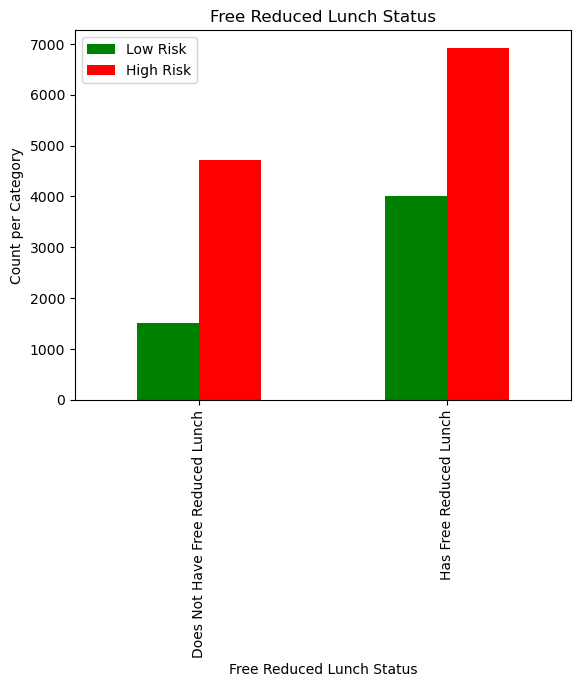

In [11]:
lunch_status_crosstab = pd.crosstab(train.free_reduced_lunch, train.risk_cat)
college_degree_crosstab.plot(kind='bar',color=colors)
labels = ['Low Risk', 'High Risk'] # blue is low risk , orange is high risk
plt.title("Free Reduced Lunch Status")
plt.xlabel("Free Reduced Lunch Status")
plt.ylabel("Count per Category")
plt.xticks([0,1], ['Does Not Have Free Reduced Lunch', 'Has Free Reduced Lunch'])
plt.legend(labels)
plt.show()

plt.show()

In [12]:
chi2_, p_value_, dof_, expected_ = chi2_contingency(lunch_status_crosstab)

# Print the results
print("Chi-square statistic:", chi2_)
print("p-value:", p_value_)
print("Degrees of freedom:", dof_)
print("Expected frequencies:", expected_)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[ 5522. 11636.]]


In [13]:
alpha = 0.05  # Significance level

if p_value_ < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


# Now to see `parents_married`  and its affect on risk category

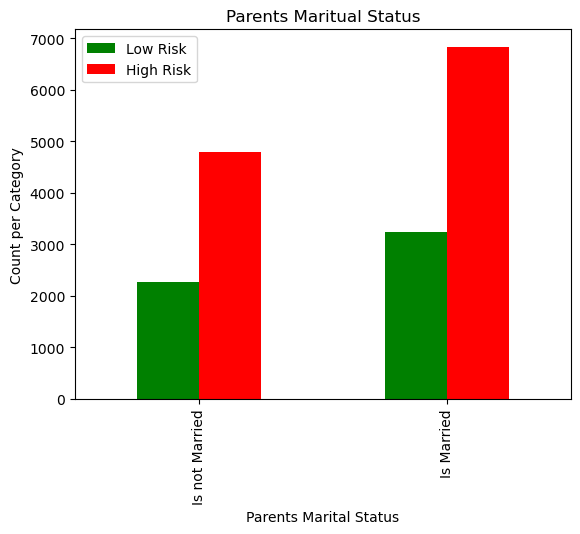

In [14]:
married = pd.crosstab(train.parents_married, train.risk_cat)
married.plot(kind='bar', color= colors)
labels = ['Low Risk', 'High Risk'] # blue is low risk , orange is high risk
plt.title("Parents Maritual Status")
plt.xlabel("Parents Marital Status")
plt.ylabel("Count per Category")
plt.xticks([0,1], ['Is not Married', 'Is Married'])
plt.legend(labels)
plt.show()
 
plt.show()

In [15]:
chi2_married, p_value_married, dof_married, expected_married = chi2_contingency(lunch_status_crosstab)

# Print the results
print("Chi-square statistic:", chi2_married)
print("p-value:", p_value_married)
print("Degrees of freedom:", dof_married)
print("Expected frequencies:", expected_married)

Chi-square statistic: 0.0
p-value: 1.0
Degrees of freedom: 0
Expected frequencies: [[ 5522. 11636.]]


In [16]:
alpha = 0.05  # Significance level

if p_value_ < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


# `rides_bus`

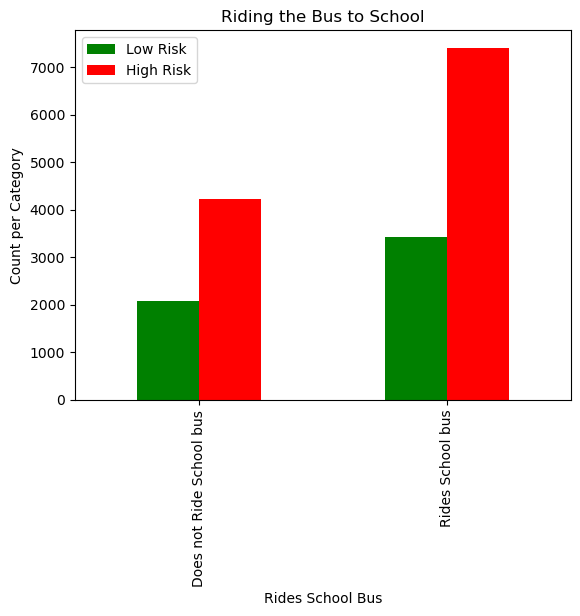

In [17]:
bus = pd.crosstab(train.rides_bus, train.risk_cat)
bus.plot(kind='bar', color= colors)
labels = ['Low Risk', 'High Risk'] # blue is low risk , orange is high risk
plt.title("Riding the Bus to School")
plt.xlabel("Rides School Bus")
plt.ylabel("Count per Category")
plt.xticks([0,1], ['Does not Ride School bus', 'Rides School bus'])
plt.legend(labels)
plt.show()

plt.show()

# `nr_siblings` 
    The number of siblings a student has can contribute insight on homelife. The more siblings the more likely there parents are able to afford rasing a child. This may also indicate parents are more worked to support multiple children.

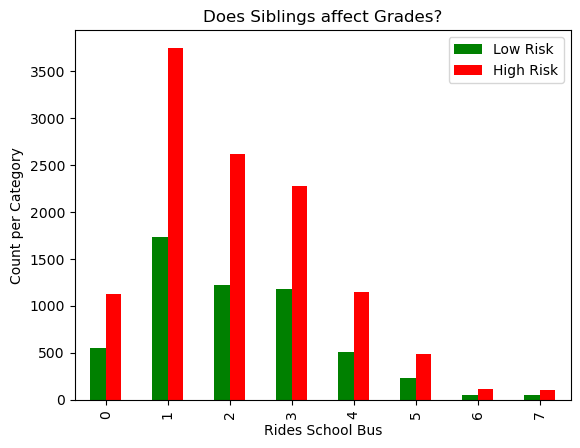

In [18]:
siblings = pd.crosstab(train.nr_siblings, train.risk_cat)
siblings.plot(kind='bar', color= colors)
labels = ['Low Risk', 'High Risk'] # blue is low risk , orange is high risk
plt.title("Does Siblings affect Grades?")
plt.xlabel("Rides School Bus")
plt.ylabel("Count per Category")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['0', '1', '2', '3', '4', '5', '6', '7'])
plt.legend(labels)
plt.show()

plt.show()

In [19]:
from sklearn.cluster import KMeans
X = train

In [20]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
train['cluster'] = kmeans.predict(X)

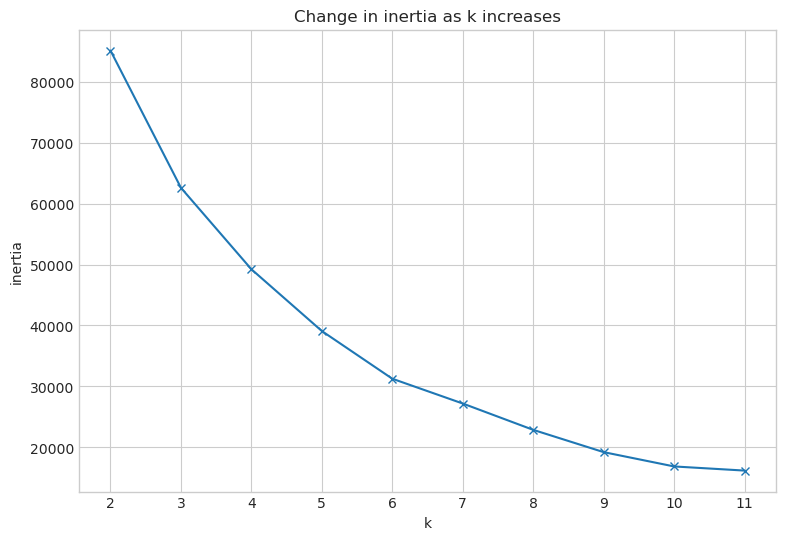

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


In [22]:
train

,has_college_degree,free_reduced_lunch,parents_married,is_first_child,nr_siblings,rides_bus,risk_cat,cluster
305,0,1,0,0,1.0,1,1,5
25688,1,1,0,1,2.0,1,1,9
9208,0,1,1,1,0.0,0,1,7
20480,1,1,1,0,1.0,1,0,2
366,0,1,0,1,3.0,0,1,1
...,...,...,...,...,...,...,...,...
27130,1,1,0,0,1.0,1,0,5
19584,1,1,0,1,0.0,0,1,7
29961,0,1,0,0,2.0,0,0,9
3040,0,1,1,1,1.0,1,0,0


In [23]:
df.to_csv('modeling_edu_data.csv', index=False)